# Linear Regression
Reference: https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902

Dataset source: https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021

In [11]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import torch

mu = []
std = []

def plot_data(x, y):
	plt.xlabel('house size')
	plt.ylabel('price')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = (data[:,i] - torch.mean(data[:,i])/torch.std(data[:, i]))
		mu.append(torch.mean(data[:,i]))
		std.append(torch.std(data[:,i]))

def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.fillna(0, inplace=True)
    columns_of_interest = [
		"bathrooms",
		"bedrooms",
		"favoriteCount",
		"lastSoldPrice",
		"pageViewCount",
		"price",
	]

    extracted_data = df[columns_of_interest]
    data = torch.tensor(extracted_data.values, dtype=float)
    # plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :-1], data[:, -1]

In [12]:
# Linear function
def h(x, theta):
    return torch.matmul(x, theta)

# Cost function
def cost_function(x, y, theta):
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * y.shape[0])


# Gradient descent
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        d_cost = (1 / m) * (x.T @ (h_x - y))
        theta = theta - (learning_rate) * d_cost
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

In [13]:
def plot_cost(J_all, num_epochs):
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(num_epochs, J_all, "m", linewidth="5")
    plt.show()


def test(theta, x):
    x[0] = (x[0] - mu[0]) / std[0]
    x[1] = (x[1] - mu[1]) / std[1]

    y = theta[0] + theta[1] * x[0] + theta[2] * x[1]
    print("Price of house: ", y)

/tmp/ipykernel_90878/2566840474.py:22: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=",", index_col=False)


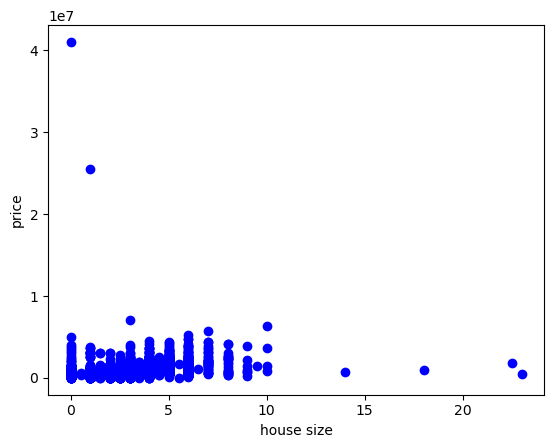

Training size: 20584, Testing size: 5147
Test cost:  tensor([[2.9302e+08]], dtype=torch.float64)
Parameters:  tensor([[583174.4193],
        [  5620.8879],
        [ -2602.6424],
        [  -595.2964],
        [447365.6209],
        [  6759.1581]], dtype=torch.float64)


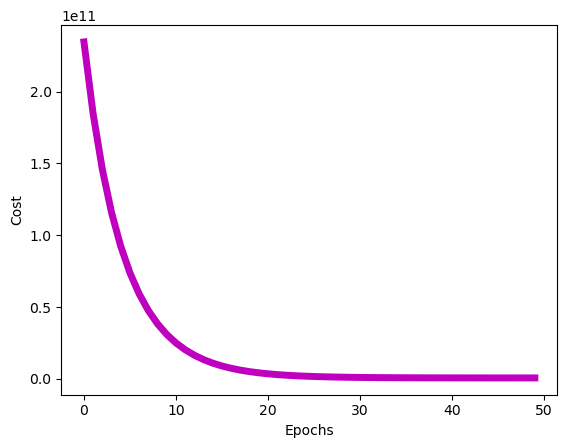

In [14]:
# Import & visualize

x, y = load_data("../../../datasets/house_price/portland_housing.csv")

y = torch.reshape(y, (x.shape[0], 1))
x = torch.hstack((torch.ones((x.shape[0], 1)), x))

train_size = int(x.shape[0] * 4/5)
test_size = x.shape[0] - train_size

print(f"Training size: {train_size}, Testing size: {test_size}")
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size, :]
y_test = y[train_size:, :]

theta = torch.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x_train, y_train, theta, learning_rate, num_epochs)

# Test
J = cost_function(x_test, y_test, theta)
print("Test cost: ", J)
print("Parameters: ", theta)

# plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = torch.tensor(jplot)
n_epochs = torch.tensor(n_epochs)
plot_cost(jplot, n_epochs)

tensor([ 51, 127,  64,  38, 175,  52, 198, 179,  79, 134], dtype=torch.int32)


/tmp/ipykernel_90878/2566840474.py:22: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=",", index_col=False)


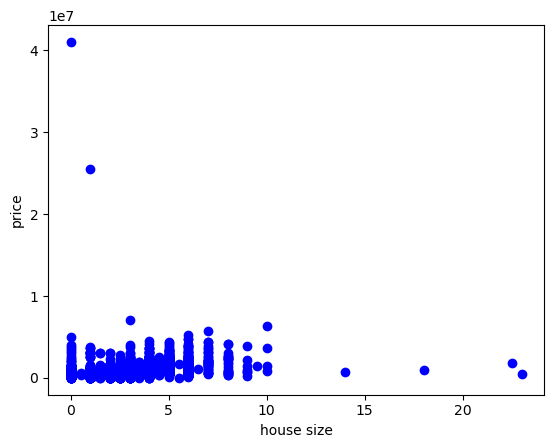

Training size: 20584, Testing size: 5147
Round 0, theta: tensor([[242929.3281],
        [ 50498.9805],
        [ 28653.7070],
        [ -7124.1611],
        [138258.2969],
        [ -2167.0435]])
Test cost:  tensor([[5.3517e+10]], dtype=torch.float64)
Round 1, theta: tensor([[387486.7812],
        [ 61922.4492],
        [ 28760.5156],
        [ -9857.5107],
        [223284.6094],
        [ -1381.5414]])
Test cost:  tensor([[1.8546e+10]], dtype=torch.float64)
Round 2, theta: tensor([[472699.0312],
        [ 60290.4180],
        [ 21691.4961],
        [-10358.9043],
        [280064.4688],
        [   700.6058]])
Test cost:  tensor([[7.1403e+09]], dtype=torch.float64)
Round 3, theta: tensor([[522523.1875],
        [ 54632.3828],
        [ 14161.4033],
        [ -9821.1104],
        [320108.6250],
        [  3190.6189]])
Test cost:  tensor([[3.2595e+09]], dtype=torch.float64)
Round 4, theta: tensor([[551407.5625],
        [ 48096.5586],
        [  7988.2891],
        [ -8883.5732],
       

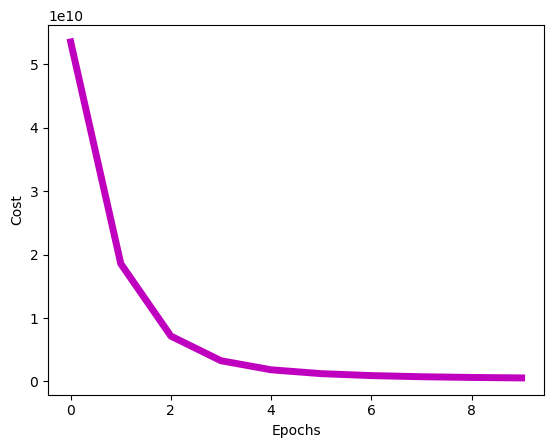

In [21]:
torch.random.seed()
num_device = 10
per_device_size = torch.empty(num_device).normal_(mean=100, std=50)
per_device_size = per_device_size.int()
print(per_device_size)

# Import & visualize
x, y = load_data("../../../datasets/house_price/portland_housing.csv")
y = torch.reshape(y, (x.shape[0], 1))
x = torch.hstack((torch.ones((x.shape[0], 1)), x))

train_size = int(x.shape[0] * 4 / 5)
test_size = x.shape[0] - train_size

print(f"Training size: {train_size}, Testing size: {test_size}")
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size, :]
y_test = y[train_size:, :]

# Partition
per_device_idx = [torch.randperm(train_size)[:per_device_size[i]] for i in range(num_device)]
x_data_device = [x_train[per_device_idx[i], :] for i in range(num_device)]
y_data_device = [y_train[per_device_idx[i], :] for i in range(num_device)]

theta = torch.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 5
num_round = 10

J_test = []

for i in range(num_round):
    theta_next = torch.zeros((x.shape[1], 1))
    for j in range(num_device):
        theta_local, _ = gradient_descent(x_data_device[j], y_data_device[j], theta, learning_rate, num_epochs)
        theta_next += per_device_size[j] / sum(per_device_size) * theta_local

    theta = theta_next
    print(f"Round {i}, theta: {theta}")

    # Test
    J = cost_function(x_test, y_test, theta)
    J_test.append(J)
    print("Test cost: ", J)

# plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_test:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = torch.tensor(jplot)
n_epochs = torch.tensor(n_epochs)
plot_cost(jplot, n_epochs)